<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week3_MLElognormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM 5222
# Maximum Liklihood Estimation (MLE)



## Lognormal Example

Suppose we have a set of observed values $\{x_i\}, i = 1, ... ,N$ that are IID.  Call the random variables $X_i =X$. Furthermore, we specifically believe that they come from the lognormal distribution with unkown parameters $\mu$ and $\sigma$.

We seek to estimate the parameters given the information in the data. 

We have already seen an approach called moment matching.  In this case, we calculate the first and second moments of the sample and set them equal to the theoretical values of the distribution.  We obtain our estimate by solving those equations.

In the lognormal case, this would mean solving:

$$\bar{x} = \mathrm{E}(X) = e^{\mu + \frac{1}{2}\sigma^2}\\
\frac{1}{N}\sum_{k=1}^N x_k^2 = \mathrm{E}(X^2) =e^{2\mu + 2\sigma^2}$$

for $\mu$ and $\sigma$.




We would denote these solutions as $\hat{\mu}$ and $\hat{\sigma}$

It should noted that these values, which are functions of the observed random variables $X_i$, are themselves random variables. 

The MLE approach is a bit different. 

Let $f_X(x;\mu, \theta)$ be the pdf of $X$.  Because the $X_=i$ are IID, the *joint pdf* for the vector valued random variable $\mathbf{X}=(X_1, X_2,...,X_N)$ is given by
$$f_{\mathbf{X}}(x_1,x_2,...,x_n;\mu, \theta) = f_{X}(x_1;\mu, \theta)\times f_{X}(x_2;\mu, \theta)\times \cdots \times f_{X}(x_N;\mu, \theta) \\
=\Pi_{k=1}^N f_X(x_k;\mu, \theta)$$


If we insert he observed values $\{x_i\}$ into the joint pdf, we call this the "liklihood" of what we have observed.  It's not a probability, it is just he evaluated pdf value.  However, more "likely" outcomes should have higher values than less "likely" outcomes.   

The MLE estimate is to find he values of $\mu$ and $\sigma$ that maximize the value of the liklihood. Those are the estimates.  

### Log-liklihood

In practice, finding the maximum of a product is messy (think product rule).  But fortunately, the log function is monotonic, so the parameters choices that maximize the log-liklihood will also maximize tthe liklihood. And, 
the log of product is the sum of the logs.  Hence we have changed problem of maximizing a product to maximizing a sum.

That is, we will seek to maximize

$$\ln\left(f_{\mathbf{X}}(x_1,x_2,...,x_n;\mu, \theta)\right)\\
= \sum_{k=1}^N \ln\left(f_X(x_k;\mu, \theta)  \right)$$


In the case of the lognormal distribution, 

$$f_X(x;\mu, \sigma) = \frac{1}{x\sigma \sqrt{2\pi}}e^{-\frac{(\ln(x) - \mu)^2}{2\sigma^2}}$$

and therefore

$$\ln\left( f_X(x;\mu, \sigma)  \right) = -\frac{(\ln(x) - \mu)^2}{2\sigma^2} - \ln(x) -\ln(\sigma) - \frac{1}{2}\ln(2\pi)$$


To find the maximum, we take the partial derivatives with respect to $\mu$ and respectively $\sigma$ and set the resulting expressions to zero.



Observe that


$$\frac{\partial}{\partial \mu}\ln\left( f_X(x;\mu, \sigma)  \right) =  \frac{\ln(x) - \mu}{\sigma^2} $$

and


$$\frac{\partial}{\partial \sigma}\ln\left( f_X(x;\mu, \sigma)  \right)= \frac{(\ln(x) - \mu)^2}{\sigma^3} - \frac{1}{\sigma} $$

We therefore wish to solve the system:

$$\sum_{k=1}^N \frac{\ln(x_k) - \mu}{\sigma^2} =0$$

$$\sum_{k=1}^N \left( \frac{(\ln(x_k) - \mu)^2}{\sigma^3} - \frac{1}{\sigma} \right) =0$$

If we take the log of the observations $u_i = \ln(x_i))$, we can see that we we just want to set 

$\hat{\mu}_{MLE} = \frac{1}{N} \sum_{k=1}^N u_k$ wich is the mean of the sample values of $u_k$

and 

$\hat{\sigma}_{MLE}^2 = \frac{1}{N} \sum_{k=1}^N \left(u_k - \hat{\mu}_{MLE})^2  \right)$ wich is just the varince of the sample values of $u_k$

This is perhaps not shocking, since the log of lognormal distribution is normal

The point here is that the MLE estimates are not the same as the moment matching estimators. 

## Example

Let's make this real, by generating a sample from the  lognormal distribution and then pretending that we don't actually know the "true" parameters.  We will attempt to estimate them via both methods. 


We first construct a function that solves for the moment match.  Then we construct the MLE estimator

Recall that for the moment match, we need to solve

$$\bar{x} = \mathrm{E}(X) = e^{\mu + \frac{1}{2}\sigma^2}\\
\frac{1}{N}\sum_{k=1}^N x_k^2 = \mathrm{E}(X^2) =e^{2\mu + 2\sigma^2}$$


Denote the sample moments as $m_1$ and $m_2$ and taking the log of both sides, we have:


$$\ln(m_1) = \mu + \frac{1}{2}\sigma^2\\
\ln(m_2) = 2\mu + 2\sigma^2$$


Which can be solved as

$$\hat{\mu} = 2 \ln(m_1) - \frac{1}{2} \ln(m_2) = \ln\left(\frac{m_1^2}{\sqrt{m_2}}\right)$$
$$\hat{\sigma}^2 = -2\ln(m_1) +  \ln(m_2)= \ln\left(\frac{m_2}{m_1^2}\right)$$

So our function is:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def MMln(x):
    # Returns the moment matching estimators for mu and sigma assuming data is lognormal and IID
    
    m1 = np.mean(x)
    m2 = np.mean(x**2)
    
    mu_est = np.log(m1**2 /np.sqrt(m2))
    sigma_est = np.sqrt(  np.log(m2/m1**2))
    
    return mu_est, sigma_est

  
    

For the MLE estimator, a very straightforward function.

In [ ]:
def MLEln(x):
    # Returnss the MLE estimator assuming the data is lognormal
    
    u = np.log(x)
    
    mu_est = np.mean(u)
    sigma_est = np.std(u)
    
    return mu_est, sigma_est

#### Generating the fake data:

We will take $\mu = 0$ and $\sigma = 1$


In [ ]:
N = 100
x = np.random.lognormal(size = N)

MMest = MMln(x)
print(MMest)

MLEest = MLEln(x)
print(MLEest)



(0.0635067717351984, 1.0593988932468184)
(0.0915906117941694, 0.9843700911642194)


Now of course, it's impossible with a single "look" to see if we like either one of these estimators.  But we can run the trial repeatedly and understand how the estimators themselves are distributed.

In [ ]:
N = 100
M = 1000

MMest = np.zeros([M,2])
MLEest = np.zeros([M,2])

for trial in range(M):
    x = np.random.lognormal(size = N)
    MMest[trial,:] = MMln(x)
    MLEest[trial,:] = MLEln(x)
    


We first compare $\hat{\mu}$ estimates

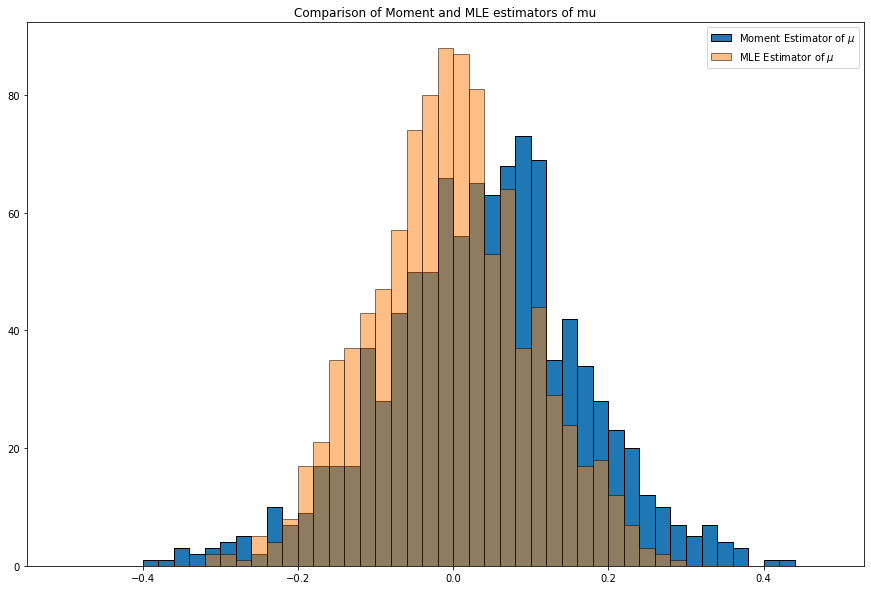

In [ ]:
plt.figure(figsize= (15,10))

binwidth = .02

plt.hist(MMest[:,0], bins = np.arange(-.5, .5, binwidth), alpha = 1,edgecolor = "black", label= "Moment Estimator of $\\mu$")

plt.hist(MLEest[:,0], bins =  np.arange(-.5, .5, binwidth), alpha = .5,edgecolor = "black", label= "MLE Estimator of $\\mu$")

plt.legend()

plt.title("Comparison of Moment and MLE estimators of mu")

plt.show()

And for the $\hat{\sigma}$ estimates

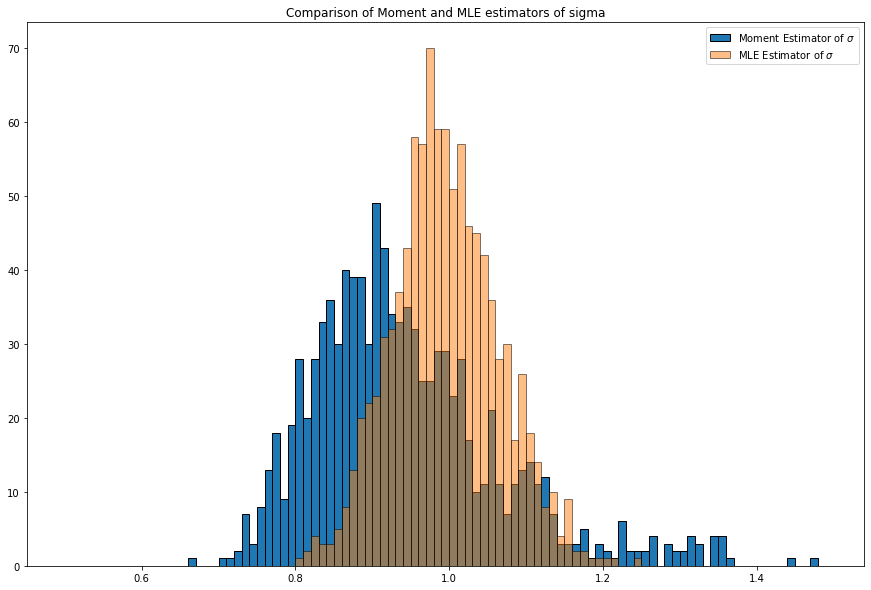

In [ ]:
plt.figure(figsize= (15,10))

binwidth = .01

plt.hist(MMest[:,1], bins = np.arange(.5, 1.5, binwidth), alpha = 1,edgecolor = "black", label= "Moment Estimator of $\\sigma$")

plt.hist(MLEest[:,1], bins =  np.arange(0.5, 1.5, binwidth), alpha = .5,edgecolor = "black", label= "MLE Estimator of $\\sigma$")

plt.legend()

plt.title("Comparison of Moment and MLE estimators of sigma")

plt.show()

Notice that in both cases, the MLE seems to bemore centered on the true value and less spread. This is becaues MLE's have several nice properties (something we will talk about later) that moment estimators in general do not.  One of which is low variance.


Let so the same experiment but with larger sample sizes.

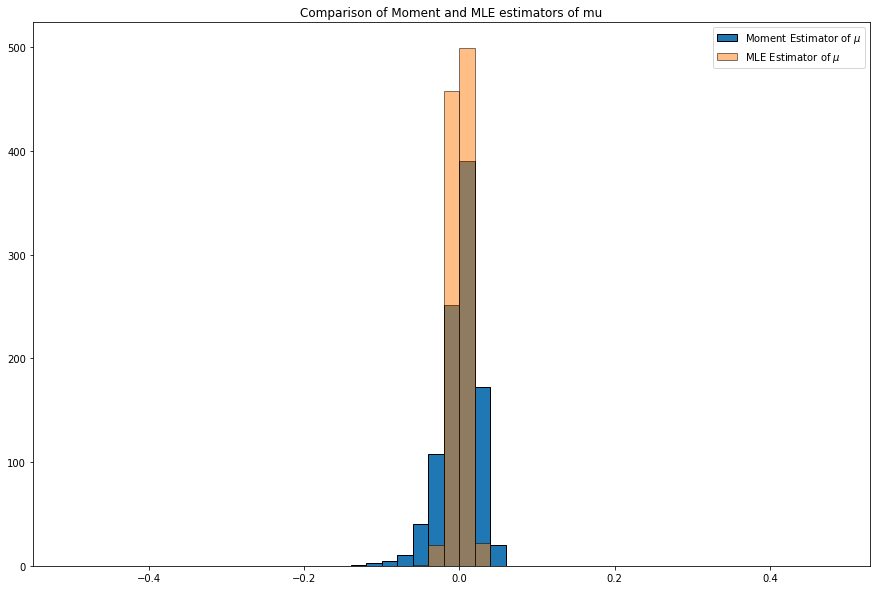

In [ ]:
N = 10000
M = 1000

MMest = np.zeros([M,2])
MLEest = np.zeros([M,2])

for trial in range(M):
    x = np.random.lognormal(size = N)
    MMest[trial,:] = MMln(x)
    MLEest[trial,:] = MLEln(x)

    
plt.figure(figsize= (15,10))

binwidth = .02

plt.hist(MMest[:,0], bins = np.arange(-.5, .5, binwidth), alpha = 1,edgecolor = "black", label= "Moment Estimator of $\\mu$")

plt.hist(MLEest[:,0], bins =  np.arange(-.5, .5, binwidth), alpha = .5,edgecolor = "black", label= "MLE Estimator of $\\mu$")

plt.legend()

plt.title("Comparison of Moment and MLE estimators of mu")

plt.show()    
    
    

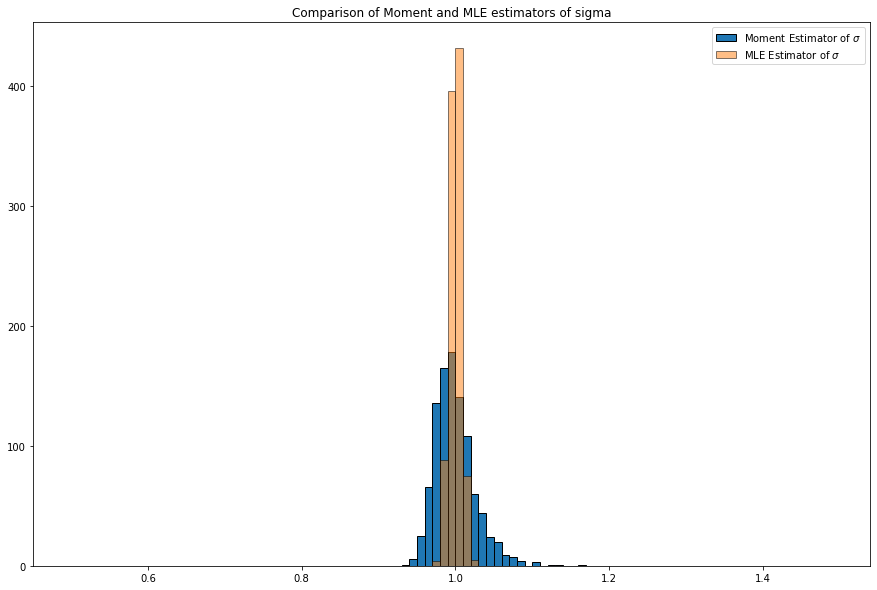

In [ ]:
plt.figure(figsize= (15,10))

binwidth = .01

plt.hist(MMest[:,1], bins = np.arange(.5, 1.5, binwidth), alpha = 1,edgecolor = "black", label= "Moment Estimator of $\\sigma$")

plt.hist(MLEest[:,1], bins =  np.arange(0.5, 1.5, binwidth), alpha = .5,edgecolor = "black", label= "MLE Estimator of $\\sigma$")

plt.legend()

plt.title("Comparison of Moment and MLE estimators of sigma")

plt.show()

We can see that both estimators appear to converge correctly, just at different speeds.